# Problem Statement :

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on - 
1. Time of purchase patterns (making sure last-minute purchases are expensive) 
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

# Aim :

To create a regression model to predict fares of flights.

In [1]:
# Importing the first required libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

And rest of the libraries will be imported according to our requirements as we proceed further into the project

In [2]:
# Getting the dataset

df=pd.read_excel("Flight.xlsx")

In [3]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,price
0,IndiGo\n6E-137/2046,Jammu,Mumbai,11:55,19:25,7h 30m,2 Stop(s),"7,365"
1,IndiGo\n6E-137/5041,Jammu,Mumbai,11:55,20:50,8h 55m,2 Stop(s),"7,365"
2,IndiGo\n6E-609/6722,Jammu,Mumbai,14:00,23:30,9h 30m,2 Stop(s),"7,365"
3,IndiGo\n6E-137/6722,Jammu,Mumbai,11:55,23:30,11h 35m,2 Stop(s),"7,365"
4,SpiceJet\nSG-160/945,Jammu,Mumbai,11:15,16:15,5h 00m,1 Stop,"7,418"


# Exploratory Data Analysis :

In [4]:
# Checking the features of the dataset

df.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'price'],
      dtype='object')

In [5]:
# Checking shape of the train dataset

df.shape

(6730, 8)

___The dataset has 6730 rows and 8 columns.___

In [6]:
# Checking datatype of the data

df.dtypes

Airline         object
Source          object
Destination     object
Dep_Time        object
Arrival_Time    object
Duration        object
Total_Stops     object
price           object
dtype: object

___So, all the features are object datatype.___

In [7]:
# Getting more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6730 entries, 0 to 6729
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       6730 non-null   object
 1   Source        6730 non-null   object
 2   Destination   6730 non-null   object
 3   Dep_Time      6730 non-null   object
 4   Arrival_Time  6730 non-null   object
 5   Duration      6730 non-null   object
 6   Total_Stops   6730 non-null   object
 7   price         6730 non-null   object
dtypes: object(8)
memory usage: 420.8+ KB


_Here we can observe that all the 6730 rows, for all the columns, are non null, that is there are no null values._

_And memory used by the dataset is 420.8+ KB._

In [8]:
# Checking for null values in dataset

df.isnull().sum()

Airline         0
Source          0
Destination     0
Dep_Time        0
Arrival_Time    0
Duration        0
Total_Stops     0
price           0
dtype: int64

___There are no null values in the dataset.___

We can also visualize and check :

In [9]:
# First importing the seaborn library

import seaborn as sns

<AxesSubplot:>

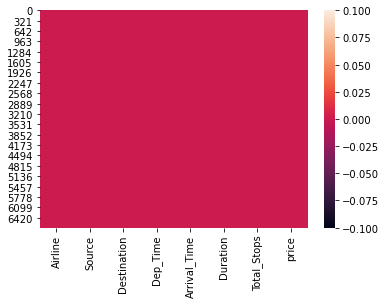

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.nunique()

Airline         139
Source            4
Destination       4
Dep_Time         67
Arrival_Time     69
Duration        107
Total_Stops       3
price            39
dtype: int64

In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

IndiGo\n6E-629/944           76
Go First\nG8-284/790         76
IndiGo\n6E-391/6326          76
Go First\nG8-501/791         76
IndiGo\n6E-672/2513          76
                             ..
SpiceJet\nSG-161/8157        29
Vistara\nUK-612/985          29
Air India\nAI-660/401/721    29
Air India\nAI-687/879        29
Air India\nAI-809/879        29
Name: Airline, Length: 139, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Bangalore    2500
Pune         2200
Mumbai       1015
Jammu        1015
Name: Source, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Goa         2500
Kolkata     2200
Bagdogra    1015
Mumbai      1015
Name: Destination, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
15:35    395
16:55    300
06:45    285
13:55    261
07:20    228
        ... 
21:40     29
19:45     29
12:25     29
18:35     29
14:00     29
Name: Dep_Time, Length: 67, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
06:25\n+ 1 day    426
09:45\n+ 1 day    377
13:15\n+ 1 day    290
13:50\n+ 1 day    284
20:50           

# Feature Engineering :

__Airline :__

In [13]:
airlines=[]
for i in df['Airline']:
    k=i.split()[0]
    airlines.append(k)
    

df['Airlines']=airlines

In [14]:
df.drop(['Airline'],axis=1,inplace=True)

In [15]:
df.head()

,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,price,Airlines
0,Jammu,Mumbai,11:55,19:25,7h 30m,2 Stop(s),"7,365",IndiGo
1,Jammu,Mumbai,11:55,20:50,8h 55m,2 Stop(s),"7,365",IndiGo
2,Jammu,Mumbai,14:00,23:30,9h 30m,2 Stop(s),"7,365",IndiGo
3,Jammu,Mumbai,11:55,23:30,11h 35m,2 Stop(s),"7,365",IndiGo
4,Jammu,Mumbai,11:15,16:15,5h 00m,1 Stop,"7,418",SpiceJet


Airlines feature is successfully cleaned and dropped the previous one.

__Dep_Time :__

In [16]:
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_minute']=pd.to_datetime(df['Dep_Time']).dt.minute

In [17]:
df.head()

,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,price,Airlines,Dep_hour,Dep_minute
0,Jammu,Mumbai,11:55,19:25,7h 30m,2 Stop(s),"7,365",IndiGo,11,55
1,Jammu,Mumbai,11:55,20:50,8h 55m,2 Stop(s),"7,365",IndiGo,11,55
2,Jammu,Mumbai,14:00,23:30,9h 30m,2 Stop(s),"7,365",IndiGo,14,0
3,Jammu,Mumbai,11:55,23:30,11h 35m,2 Stop(s),"7,365",IndiGo,11,55
4,Jammu,Mumbai,11:15,16:15,5h 00m,1 Stop,"7,418",SpiceJet,11,15


Separate columns for departure hour and minute are created.

In [18]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [19]:
df.head()

,Source,Destination,Arrival_Time,Duration,Total_Stops,price,Airlines,Dep_hour,Dep_minute
0,Jammu,Mumbai,19:25,7h 30m,2 Stop(s),"7,365",IndiGo,11,55
1,Jammu,Mumbai,20:50,8h 55m,2 Stop(s),"7,365",IndiGo,11,55
2,Jammu,Mumbai,23:30,9h 30m,2 Stop(s),"7,365",IndiGo,14,0
3,Jammu,Mumbai,23:30,11h 35m,2 Stop(s),"7,365",IndiGo,11,55
4,Jammu,Mumbai,16:15,5h 00m,1 Stop,"7,418",SpiceJet,11,15


Successfully dropped.

__Arrival_Time :__

In [20]:
df['Arrival_Time']=df['Arrival_Time'].replace("\n+","",regex=True)

In [21]:
df.Arrival_Time=df.Arrival_Time.str.split(':')

In [22]:
df['Arrival_Hour']=df.Arrival_Time.str[0]
df['Arrival_minute']=df.Arrival_Time.str[1]

In [23]:
df.head()

,Source,Destination,Arrival_Time,Duration,Total_Stops,price,Airlines,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minute
0,Jammu,Mumbai,"[19, 25]",7h 30m,2 Stop(s),"7,365",IndiGo,11,55,19,25
1,Jammu,Mumbai,"[20, 50]",8h 55m,2 Stop(s),"7,365",IndiGo,11,55,20,50
2,Jammu,Mumbai,"[23, 30]",9h 30m,2 Stop(s),"7,365",IndiGo,14,0,23,30
3,Jammu,Mumbai,"[23, 30]",11h 35m,2 Stop(s),"7,365",IndiGo,11,55,23,30
4,Jammu,Mumbai,"[16, 15]",5h 00m,1 Stop,"7,418",SpiceJet,11,15,16,15


In [24]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [25]:
df.head()

,Source,Destination,Duration,Total_Stops,price,Airlines,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minute
0,Jammu,Mumbai,7h 30m,2 Stop(s),"7,365",IndiGo,11,55,19,25
1,Jammu,Mumbai,8h 55m,2 Stop(s),"7,365",IndiGo,11,55,20,50
2,Jammu,Mumbai,9h 30m,2 Stop(s),"7,365",IndiGo,14,0,23,30
3,Jammu,Mumbai,11h 35m,2 Stop(s),"7,365",IndiGo,11,55,23,30
4,Jammu,Mumbai,5h 00m,1 Stop,"7,418",SpiceJet,11,15,16,15


Successfully dropped.

__Duration :__

In [26]:
# First assigning Duration column values into a list :

duration=list(df['Duration'])

In [27]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    # Extracts minutes from duration

In [28]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [29]:
df.head()

,Source,Destination,Duration,Total_Stops,price,Airlines,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minute,Duration_hours,Duration_mins
0,Jammu,Mumbai,7h 30m,2 Stop(s),"7,365",IndiGo,11,55,19,25,7,30
1,Jammu,Mumbai,8h 55m,2 Stop(s),"7,365",IndiGo,11,55,20,50,8,55
2,Jammu,Mumbai,9h 30m,2 Stop(s),"7,365",IndiGo,14,0,23,30,9,30
3,Jammu,Mumbai,11h 35m,2 Stop(s),"7,365",IndiGo,11,55,23,30,11,35
4,Jammu,Mumbai,5h 00m,1 Stop,"7,418",SpiceJet,11,15,16,15,5,0


Both columns are added.

In [30]:
df.drop(['Duration'],axis=1,inplace=True)

In [31]:
df.head()

,Source,Destination,Total_Stops,price,Airlines,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minute,Duration_hours,Duration_mins
0,Jammu,Mumbai,2 Stop(s),"7,365",IndiGo,11,55,19,25,7,30
1,Jammu,Mumbai,2 Stop(s),"7,365",IndiGo,11,55,20,50,8,55
2,Jammu,Mumbai,2 Stop(s),"7,365",IndiGo,14,0,23,30,9,30
3,Jammu,Mumbai,2 Stop(s),"7,365",IndiGo,11,55,23,30,11,35
4,Jammu,Mumbai,1 Stop,"7,418",SpiceJet,11,15,16,15,5,0


Successfully dropped.

__Total_Stops :__

In [32]:
df.Total_Stops.replace(['1 Stop', '2 Stop(s)', '3 Stop(s)'],[1,2,3],inplace=True)

In [33]:
df.head()

,Source,Destination,Total_Stops,price,Airlines,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minute,Duration_hours,Duration_mins
0,Jammu,Mumbai,2,"7,365",IndiGo,11,55,19,25,7,30
1,Jammu,Mumbai,2,"7,365",IndiGo,11,55,20,50,8,55
2,Jammu,Mumbai,2,"7,365",IndiGo,14,0,23,30,9,30
3,Jammu,Mumbai,2,"7,365",IndiGo,11,55,23,30,11,35
4,Jammu,Mumbai,1,"7,418",SpiceJet,11,15,16,15,5,0


Successfully replaced.

__price :__

In [34]:
df['price']=df['price'].replace(",","",regex=True)

In [35]:
df['price']=df['price'].astype('int64')

In [36]:
df.head()

,Source,Destination,Total_Stops,price,Airlines,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minute,Duration_hours,Duration_mins
0,Jammu,Mumbai,2,7365,IndiGo,11,55,19,25,7,30
1,Jammu,Mumbai,2,7365,IndiGo,11,55,20,50,8,55
2,Jammu,Mumbai,2,7365,IndiGo,14,0,23,30,9,30
3,Jammu,Mumbai,2,7365,IndiGo,11,55,23,30,11,35
4,Jammu,Mumbai,1,7418,SpiceJet,11,15,16,15,5,0


So here we have the final cleaned dataset.

# Univariate Analysis :

<AxesSubplot:xlabel='Source', ylabel='count'>

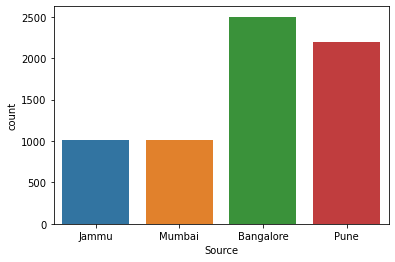

In [37]:
sns.countplot(x='Source', data=df)

Mostly the people are travelling from bangalore.

<AxesSubplot:xlabel='Destination', ylabel='count'>

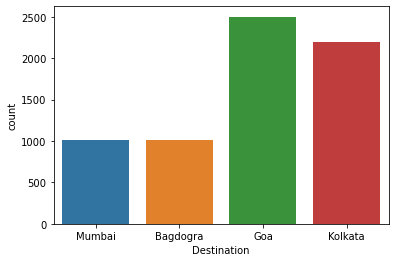

In [38]:
sns.countplot(x='Destination', data=df)

And the destinstion is mostly Goa and kolkata.

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

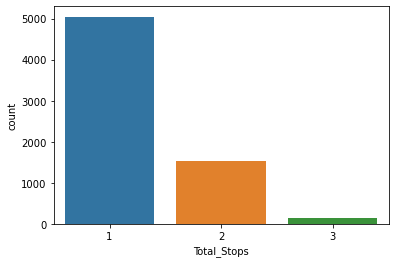

In [39]:
sns.countplot(x='Total_Stops', data=df)

Most people usually prefer routes with 1 stopage.

In [40]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='price', ylabel='Density'>

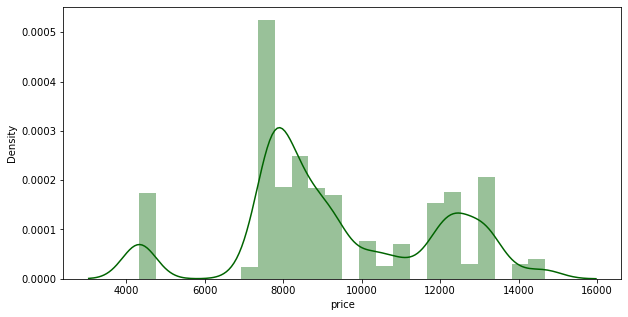

In [41]:
plt.figure(figsize=(10,5))
sns.distplot(df['price'], color='darkgreen')

Mostly the flight prices ranges around Rs. 8000.

<AxesSubplot:xlabel='Airlines', ylabel='count'>

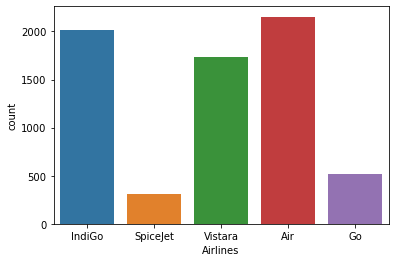

In [42]:
sns.countplot(x='Airlines', data=df)

<AxesSubplot:xlabel='Dep_hour', ylabel='Density'>

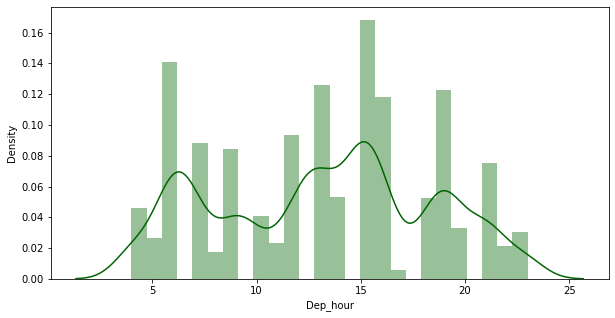

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(df['Dep_hour'], color='darkgreen')

<AxesSubplot:xlabel='Arrival_Hour', ylabel='Density'>

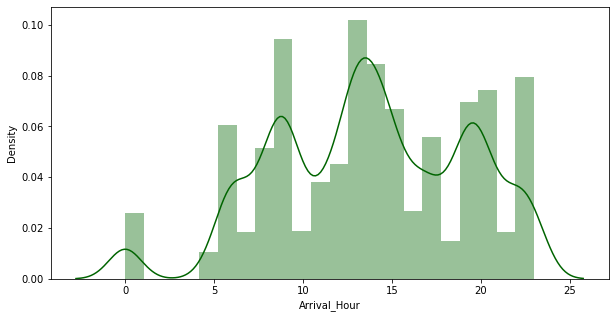

In [44]:
plt.figure(figsize=(10,5))
sns.distplot(df['Arrival_Hour'], color='darkgreen')

<AxesSubplot:xlabel='Duration_hours', ylabel='Density'>

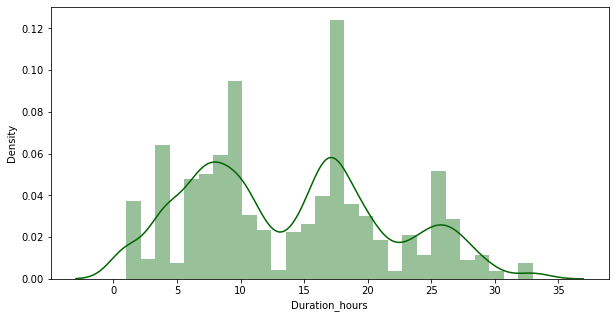

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(df['Duration_hours'], color='darkgreen')

# Bivariate Analysis :

<AxesSubplot:xlabel='Source', ylabel='price'>

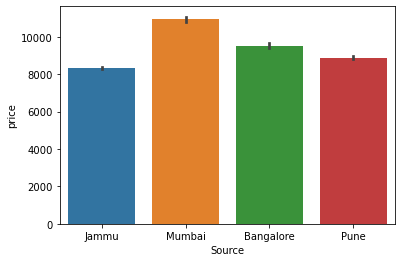

In [46]:
sns.barplot(data=df, x='Source',y='price')

Flight price from mumbai is highest.

<AxesSubplot:xlabel='Destination', ylabel='price'>

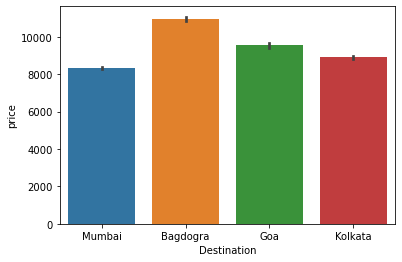

In [47]:
sns.barplot(data=df, x='Destination',y='price')

Flight price for bagdogra is highest.

<AxesSubplot:xlabel='Total_Stops', ylabel='price'>

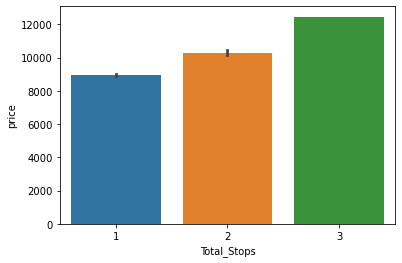

In [48]:
sns.barplot(data=df, x='Total_Stops',y='price')

Flight prices are highest for routes with 3 stoppages.

<AxesSubplot:xlabel='Airlines', ylabel='price'>

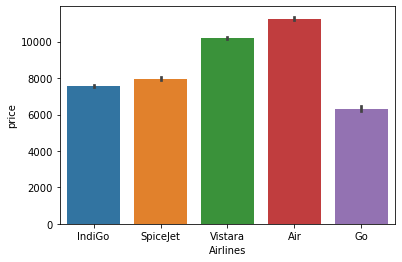

In [49]:
sns.barplot(data=df, x='Airlines',y='price')

<AxesSubplot:xlabel='Dep_hour', ylabel='price'>

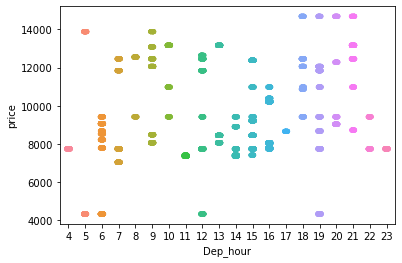

In [50]:
sns.stripplot(data=df, x='Dep_hour',y='price')

<AxesSubplot:xlabel='Arrival_Hour', ylabel='price'>

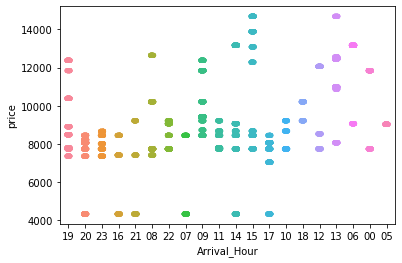

In [51]:
sns.stripplot(data=df, x='Arrival_Hour',y='price')

<AxesSubplot:xlabel='Duration_hours', ylabel='price'>

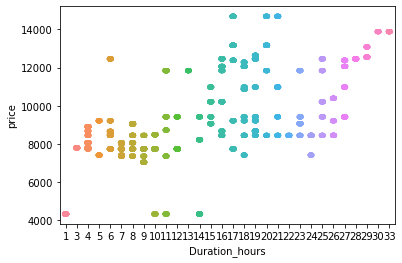

In [52]:
sns.stripplot(data=df, x='Duration_hours',y='price')

# Multivariate Analysis :

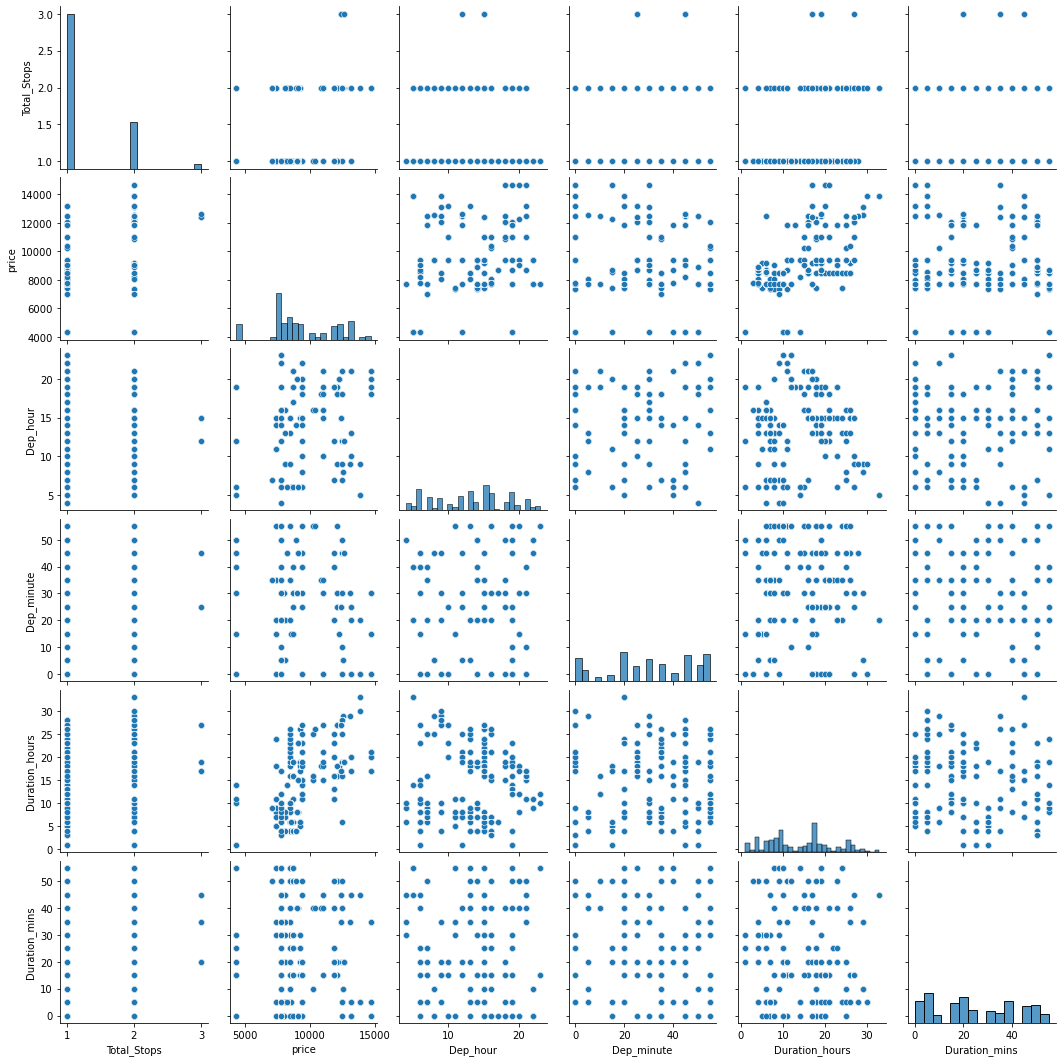

In [53]:
sns.pairplot(df)

# Label Encoder :

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le=LabelEncoder()

In [56]:
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])

In [57]:
df.head(10)

,Source,Destination,Total_Stops,price,Airlines,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minute,Duration_hours,Duration_mins
0,1,3,2,7365,2,11,55,15,10,7,30
1,1,3,2,7365,2,11,55,16,20,8,55
2,1,3,2,7365,2,14,0,19,12,9,30
3,1,3,2,7365,2,11,55,19,12,11,35
4,1,3,1,7418,3,11,15,12,6,5,0
5,1,3,1,7418,3,14,35,17,16,7,5
6,1,3,1,7418,3,14,35,4,17,18,5
7,1,3,1,7418,3,15,20,12,7,24,55
8,1,3,1,8014,2,16,30,19,12,7,0
9,1,3,1,8450,4,15,35,16,2,4,30


In [58]:
# Checking various factors of the dataset

df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Source,6730.0,1.433135,1.281602,0.0,0.0,1.0,3.0,3.0
Destination,6730.0,1.477712,0.923525,0.0,1.0,1.0,2.0,3.0
Total_Stops,6730.0,1.273254,0.494657,1.0,1.0,1.0,2.0,3.0
price,6730.0,9354.786627,2505.238996,4337.0,7743.0,8662.0,11838.0,14678.0
Airlines,6730.0,1.845171,1.553077,0.0,0.0,2.0,4.0,4.0
Dep_hour,6730.0,13.194502,5.175740,4.0,9.0,13.0,16.0,23.0
Dep_minute,6730.0,30.161961,17.786249,0.0,20.0,30.0,45.0,55.0
Arrival_Hour,6730.0,9.801189,5.139949,0.0,5.0,10.0,15.0,19.0
Arrival_minute,6730.0,12.071471,6.728815,0.0,6.0,12.0,19.0,23.0
Duration_hours,6730.0,13.825706,7.676690,1.0,8.0,14.0,19.0,33.0


__Observations :__

   1. Some of the features has skewness, due the difference between mean and median of that features.
   2. Outliers are present due to huge differences between the 75th percentile and the max value.

In [59]:
# Checking Skewness of the dataset

df.skew()

Source            0.085206
Destination       0.065360
Total_Stops       1.574496
price             0.105316
Airlines          0.159997
Dep_hour         -0.057263
Dep_minute       -0.232382
Arrival_Hour      0.004982
Arrival_minute   -0.245418
Duration_hours    0.302080
Duration_mins     0.155137
dtype: float64

_The data is fairly symmetrical if the skewness is between +/-0.5._

_If the skewness is between -1 and – 0.5 or between 0.5 and 1, then there is a little decent skewness._

_If the skewness is less than -1 or greater than 1, the data are highly skewed._

__Observation :__
    
    "Total_Stops" is a little skewed
    
We can handle it later on using power transformation.

# Detecting Outliers :

Source               AxesSubplot(0.125,0.657941;0.168478x0.222059)
Destination       AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Total_Stops       AxesSubplot(0.529348,0.657941;0.168478x0.222059)
price             AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Airlines             AxesSubplot(0.125,0.391471;0.168478x0.222059)
Dep_hour          AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Dep_minute        AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Arrival_Hour      AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Arrival_minute          AxesSubplot(0.125,0.125;0.168478x0.222059)
Duration_hours       AxesSubplot(0.327174,0.125;0.168478x0.222059)
Duration_mins        AxesSubplot(0.529348,0.125;0.168478x0.222059)
dtype: object

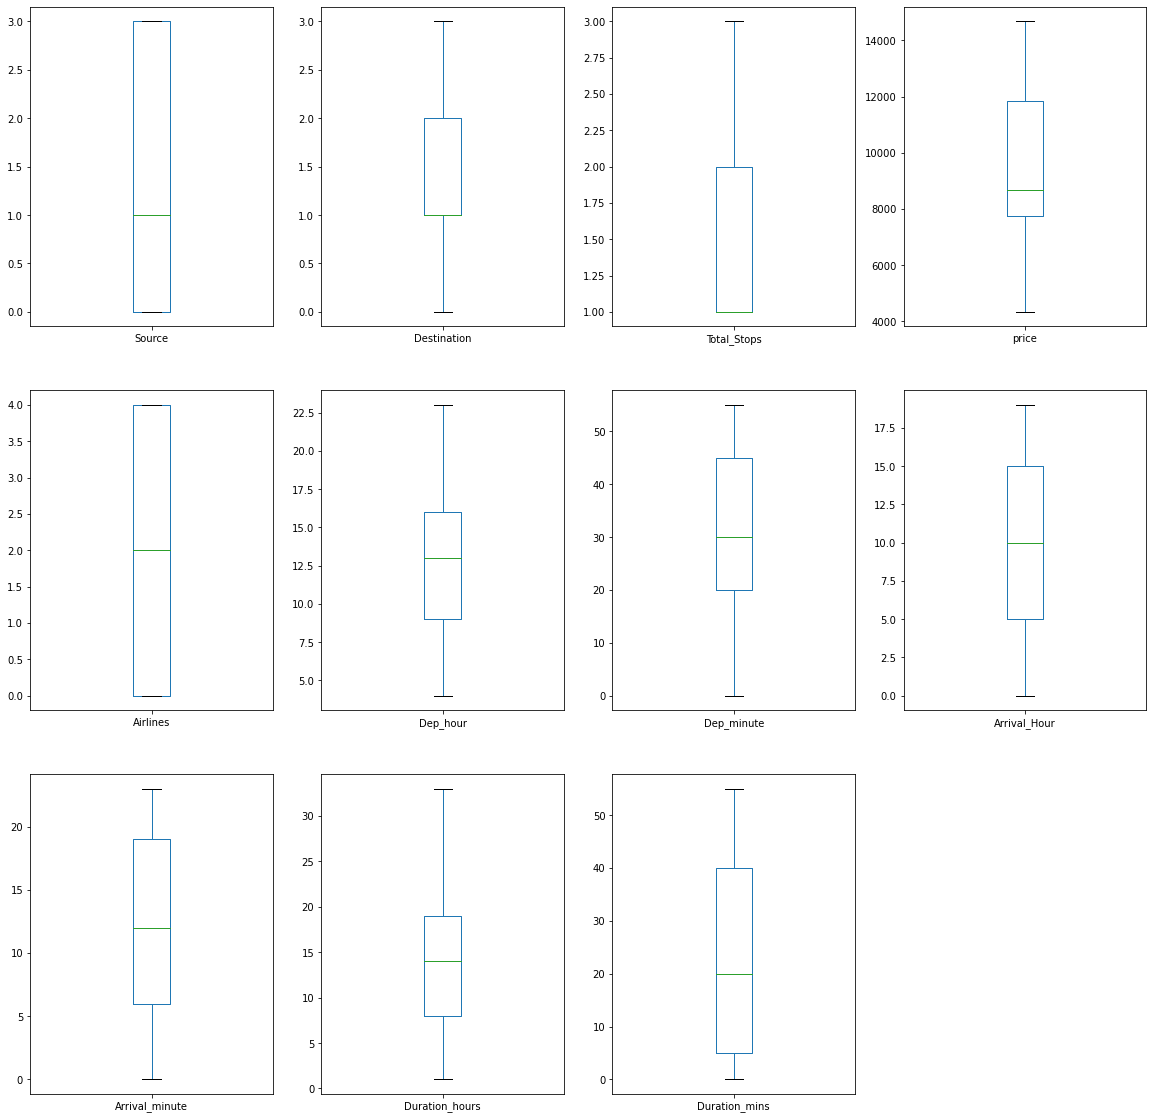

In [60]:
df.plot(kind='box', subplots=True, layout=(3,4), figsize=(20,20))

There are no visible outliers.

In [61]:
# Importing required zscore library

from scipy.stats import zscore

In [62]:
import numpy as np

In [63]:
z=np.abs(zscore(df))

In [64]:
threshold=3

In [65]:
df_new=df[(z<3).all(axis=1)] 

In [66]:
print('Shape of original dataframe', df.shape)

Shape of original dataframe (6730, 11)


In [67]:
print('Shape of dataframe after outliers removal', df_new.shape)

Shape of dataframe after outliers removal (6575, 11)


In [68]:
# Data loss percentage

loss=((6730-6575)/6730)*100
print('Data loss percentage ',loss)

Data loss percentage  2.3031203566121845


So, we have successfully removed the outliers, with 2.3% data loss.

In [69]:
df=df_new

# Spliting the dataset :

In [70]:
# Data part

x=df.drop(['price'],axis=1)

In [71]:
x.head()

,Source,Destination,Total_Stops,Airlines,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minute,Duration_hours,Duration_mins
0,1,3,2,2,11,55,15,10,7,30
1,1,3,2,2,11,55,16,20,8,55
2,1,3,2,2,14,0,19,12,9,30
3,1,3,2,2,11,55,19,12,11,35
4,1,3,1,3,11,15,12,6,5,0


In [72]:
# Target

y=df.price

In [73]:
y.head()

0    7365
1    7365
2    7365
3    7365
4    7418
Name: price, dtype: int64

# Feature Scaling :
To transform the dataset into same format, so that we have a uniform dataset.

In [74]:
# Importing required scaler library

from sklearn.preprocessing import StandardScaler

In [75]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

,Source,Destination,Total_Stops,Airlines,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minute,Duration_hours,Duration_mins
0,-0.311116,1.648781,1.816644,0.072068,-0.414212,1.382174,1.007101,-0.343449,-0.869654,0.322089
1,-0.311116,1.648781,1.816644,0.072068,-0.414212,1.382174,1.201703,1.159397,-0.738823,1.755900
2,-0.311116,1.648781,1.816644,0.072068,0.159467,-1.681815,1.785506,-0.042880,-0.607992,0.322089
3,-0.311116,1.648781,1.816644,0.072068,-0.414212,1.382174,1.785506,-0.042880,-0.346330,0.608852
4,-0.311116,1.648781,-0.550466,0.719404,-0.414212,-0.846182,0.423298,-0.944587,-1.131317,-1.398483
5,-0.311116,1.648781,-0.550466,0.719404,0.159467,0.267996,1.396304,0.558258,-0.869654,-1.111721
6,-0.311116,1.648781,-0.550466,0.719404,0.159467,0.267996,-1.133511,0.708543,0.569489,-1.111721
7,-0.311116,1.648781,-0.550466,0.719404,0.350693,-0.567638,0.423298,-0.794302,1.354476,1.755900
8,-0.311116,1.648781,-0.550466,0.072068,0.541919,-0.010549,1.785506,-0.042880,-0.869654,-1.398483
9,-0.311116,1.648781,-0.550466,1.366739,0.350693,0.267996,1.201703,-1.545725,-1.262148,0.322089


# Power Transformation :
I will use Yeo-Johnson to transform this continuous dataset so that the resulting features looks more normally distributed. And also reduce skewness and outliers.

In [76]:
# First importing the required library for power transformation

from sklearn.preprocessing import PowerTransformer

In [77]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head()

,Source,Destination,Total_Stops,Airlines,Dep_hour,Dep_minute,Arrival_Hour,Arrival_minute,Duration_hours,Duration_mins
0,-0.247773,1.60079,1.816644,0.117048,-0.430304,1.472371,1.007003,-0.438610,-0.868574,0.389225
1,-0.247773,1.60079,1.816644,0.117048,-0.430304,1.472371,1.201137,1.225319,-0.714093,1.641682
2,-0.247773,1.60079,1.816644,0.117048,0.140007,-1.577296,1.783221,-0.149649,-0.562640,0.389225
3,-0.247773,1.60079,1.816644,0.117048,-0.430304,1.472371,1.783221,-0.149649,-0.269562,0.655852
4,-0.247773,1.60079,-0.550466,0.740507,-0.430304,-0.871504,0.424210,-0.965805,-1.186003,-1.482834


# Variance Inflation Factor :
It helps us to eliminate multi co-linearity.

In [78]:
# Importing required library for variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [80]:
vif_calc()

   VIF Factor        Features
0    1.273930          Source
1    1.387935     Destination
2    1.150964     Total_Stops
3    1.537787        Airlines
4    1.056959        Dep_hour
5    1.342766      Dep_minute
6    1.219329    Arrival_Hour
7    1.524677  Arrival_minute
8    1.243404  Duration_hours
9    1.077004   Duration_mins


# Machine Learning Models :
Here we have a linear case, hence we'll go with Linear Regression and various other regression models.

In [81]:
# Importing the necessary libraries :
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Finding best random state :

In [82]:
score=0
random_state=0

for i in range(1, 1000):
    x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    
    if r2>score:
        score=r2
        random_state=i

print("Highest r2 score is", score,"on random state", random_state)

Highest r2 score is 0.5932054630740843 on random state 419


# Required Evaluation Metrices :

In [83]:
# Spliting the dataset
def reg(model, x, y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=517)
# Here 20% will be used for testing purpose and rest 80% for training purpose.
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting x_test
    pred=model.predict(x_test)
    
    # Mean square error should be low always
    mse=mean_squared_error(y_test,pred,squared=False)
    print("Mean Square Error Score is:", mse)
    
    # r2 score
    r2=r2_score(y_test,pred,multioutput='variance_weighted')*100
    print("r2 Score is:", r2)
    
    # Cross Validation Score
    cv=(cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv)
    
     
    # Difference between r2 score and cv score
    diff = r2-cv
    print("Difference between r2 Score and Cross Validation Score is", diff)

Now we can call all the models one by one using this function :

In [84]:
# Linear Regression

model=LinearRegression()
reg(model,x,y)

Mean Square Error Score is: 1636.2886042734997
r2 Score is: 56.95871261715937
Cross Validation Score: -0.9418756189332544
Difference between r2 Score and Cross Validation Score is 57.900588236092624


In [85]:
# Ridge Regression

model=Ridge(alpha=0.001, normalize=True)
reg(model,x,y)

Mean Square Error Score is: 1636.3621044632262
r2 Score is: 56.95484580071661
Cross Validation Score: -0.7555687525192001
Difference between r2 Score and Cross Validation Score is 57.710414553235815


In [86]:
# Lasso Regression

model=Lasso(alpha=0.001, normalize=True)
reg(model,x,y)

Mean Square Error Score is: 1636.2968600723143
r2 Score is: 56.95827829144831
Cross Validation Score: -0.9226221635062615
Difference between r2 Score and Cross Validation Score is 57.88090045495457


In [87]:
# ElasticNet

model=ElasticNet (alpha=0.0001)
reg(model,x,y)

Mean Square Error Score is: 1636.2922471532138
r2 Score is: 56.95852097076302
Cross Validation Score: -0.9314255561580987
Difference between r2 Score and Cross Validation Score is 57.889946526921115


In [88]:
# Support Vector Regression (poly)

model=SVR(kernel='poly', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 2429.150735587548
r2 Score is: 5.141911073980065
Cross Validation Score: -3.8933783015058143
Difference between r2 Score and Cross Validation Score is 9.03528937548588


In [89]:
# Support Vector Regression (linear)

model=SVR(kernel='linear', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 1835.6920611562934
r2 Score is: 45.829218551936066
Cross Validation Score: 3.2919261426986512
Difference between r2 Score and Cross Validation Score is 42.537292409237416


In [90]:
# Support Vector Regression (rbf)

model=SVR(kernel='rbf', gamma='auto')
reg(model,x,y)

Mean Square Error Score is: 2464.799751334559
r2 Score is: 2.3373005713200223
Cross Validation Score: -4.89202951208824
Difference between r2 Score and Cross Validation Score is 7.2293300834082626


In [91]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model,x,y)

Mean Square Error Score is: 0.0
r2 Score is: 100.0
Cross Validation Score: 49.66496562887198
Difference between r2 Score and Cross Validation Score is 50.33503437112802


In [92]:
# Random Forest Regressor

model=RandomForestRegressor(n_estimators=10,random_state=40)
reg(model,x,y)

Mean Square Error Score is: 0.0
r2 Score is: 100.0
Cross Validation Score: 80.11512882810926
Difference between r2 Score and Cross Validation Score is 19.884871171890737


In [93]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2)
reg(model,x,y)

Mean Square Error Score is: 0.0
r2 Score is: 100.0
Cross Validation Score: 80.11512882810926
Difference between r2 Score and Cross Validation Score is 19.884871171890737


In [94]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(n_estimators=120)
reg(model,x,y)

Mean Square Error Score is: 176.32125643789598
r2 Score is: 99.5002247041042
Cross Validation Score: 81.12691240894716
Difference between r2 Score and Cross Validation Score is 18.373312295157035


In [95]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=100,learning_rate=1.0,random_state=40)
reg(model,x,y)

Mean Square Error Score is: 732.1445179977069
r2 Score is: 91.38294091167255
Cross Validation Score: 68.40658224262931
Difference between r2 Score and Cross Validation Score is 22.976358669043236


In [96]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=300)
reg(model,x,y)

Mean Square Error Score is: 0.0
r2 Score is: 100.0
Cross Validation Score: 76.6201296058886
Difference between r2 Score and Cross Validation Score is 23.379870394111407


After finding all the scores of various models, we found that Gradient Boosting Regressor model gives the best r2 score. Hence we choose this model and proceed further with the process.

# Hyper Parameter Tuning :
Applying hyper parameter tuning using Grid Search CV method, to find the best parameters of Gradient Boosting Regressor Model

In [97]:
GradientBoostingRegressor(loss='squared_error',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0)

GradientBoostingRegressor()

These are the various parameters for GradientBoostingRegressor, which i found by clicking shift+tab buttons inside the function.

First we have to create a dictionary of these parameters so that it can be passsed to the grid search function.

In [101]:
params={'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
        'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae'],
        'max_features' : ['auto', 'sqrt', 'log2']}

In [102]:
grid=GridSearchCV(GradientBoostingRegressor(), params, cv=5)

In [103]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [104]:
grid.best_params_

{'criterion': 'friedman_mse', 'loss': 'squared_error', 'max_features': 'auto'}

So here we have found the best parameters for our model, and now we can finally train our model.

In [105]:
GBR=GradientBoostingRegressor(criterion='friedman_mse', max_features='auto', n_estimators=300, loss='squared_error')

In [106]:
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)
r2=r2_score(y_test, pred)*100
print('r2 score for the final model : ',r2)

r2 score for the final model :  99.95537170309332


# Saving the best model :

In [107]:
import pickle
filename='Flight.pkl'
pickle.dump(GBR,open(filename,'wb'))

# Predictions :

In [108]:
prediction = GBR.predict(x_test)
prediction

array([11845.78114136,  9442.20972026, 12096.11478834, ...,
        8412.16777792, 10211.28693392, 11091.11664465])

In [109]:
pd.DataFrame([prediction[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,11845.781141,11838.0
1,9442.209720,9420.0
2,12096.114788,12057.0
3,12458.257787,12454.0
4,4351.542992,4338.0
...,...,...
1310,7760.035378,7742.0
1311,9030.179132,9064.0
1312,8412.167778,8450.0
1313,10211.286934,10209.0


Here we have achieved the predicted and actual values in a dataframe. They are mostly similar.

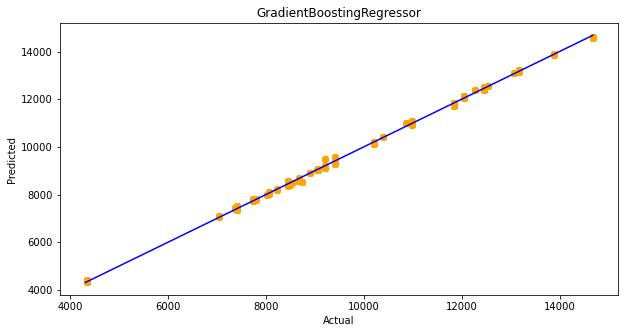

In [110]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, color='orange')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("GradientBoostingRegressor")
plt.show()

Blue line denotes the actual values and the orange dots are the predicted values.

# THANK YOU.